In [244]:
import torch

w = torch.empty(3, 5)
torch.nn.init.xavier_uniform_(w, gain=torch.nn.init.calculate_gain('tanh'))

tensor([[ 0.7494,  0.6605, -0.0621,  0.9411, -1.1776],
        [ 1.0738,  0.4058,  0.5306,  0.0247,  0.8393],
        [ 1.4252,  0.6093, -0.8966,  1.0223, -0.3300]])

In [250]:
def init(module, weight_init, bias_init, gain=1):
    weight_init(module.weight.data, gain=gain)
    bias_init(module.bias.data)
    return module
init_ = lambda m: init(m, torch.nn.init.orthogonal_, lambda x: torch.nn.init.constant_(x, 0), np.sqrt(2))
l = init_(torch.nn.Linear(3, 5))
l.weight

Parameter containing:
tensor([[ 0.1562, -1.3032, -0.4418],
        [-0.5395,  0.2274, -0.9939],
        [ 1.1496,  0.3956, -0.4242],
        [-0.1234, -0.1706,  0.7735],
        [ 0.5896, -0.2538,  0.1968]], requires_grad=True)

In [257]:
n_tot = 10000
t = np.zeros(n_tot)
for i in range(n_tot):
    s = (0.001 - 0.2) * torch.rand(1).item() + 0.2
    t[i] = np.random.normal(0, s**(1/2))
np.mean((t-0)**2)

0.10171076109336696

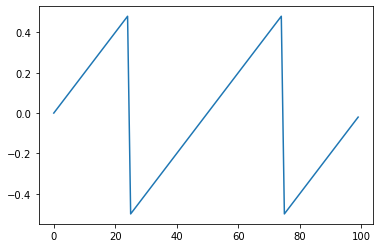

In [101]:
def f_sawtooth(x, period=50):
    saw_tooth = 2 * (x / period - np.floor(0.5 + x / period))
    saw_tooth = (0.5 - (-0.5)) / (1 - (-1)) * (saw_tooth - 1) + 0.5
    return saw_tooth
x = np.arange(100)
plt.plot(x, f_sawtooth(x, 50))

In [277]:
t = [-11.75, -10.75, -31.0, -6.75, -29.25, -29.25, -5.0, -10.0, -11.0, -7.0, -31.25, -10.75, -7.25, -8.0, -2.75, -7.5, -4.0, -6.25, -10.0, -4.5, -10.0, -5.0, -4.25, -6.5, -6.5, -6.75, -31.0, -4.25, -6.0, -5.25, -7.5, -4.5, -6.0, -3.25, -6.5, -6.75, -6.0, -6.5, -6.75, -7.75, -7.5, -7.5, -6.0, -9.75, -8.25, -6.25, -5.25, -8.75, -8.75, -8.0, -9.0, -13.5, -11.0, -11.0, -8.5, -11.5, -9.5, -8.25, -12.5, -10.0, -8.75, -7.5, -12.0, -11.0, -7.0, -9.0, -13.75, -9.25, -11.5, -14.0, -32.0, -10.75, -6.5, -9.75, -12.75,-8.0, -11.25, -10.75, -5.0, -14.5, -13.5, -9.25, -9.25, -9.75, -14.75, -12.75, -12.75, -11.25, -16.5, -8.5, -12.75, -32.25, -11.25, -13.0, -17.0, -15.75, -11.75, -12.75, -16.0, -8.25, -9.5, -9.5, -13.25, -13.25, -10.5, -10.75, -8.75, -16.5, -8.25, -30.25, -38.0, -9.0, -11.0, -9.75, -32.75, -10.75, -10.25, -11.5, -8.0, -5.25, -12.0, -8.25, -13.5,-4.25, -8.25, -9.5, -9.75, -8.0, -7.0, -57.0, -5.0, -8.5, -9.5, -8.75, -31.25, -7.25, -6.25, -7.5, -7.25, -6.25, -4.0, -31.25, -5.5, -4.0, -4.0, -6.0, -2.5, -6.0, -31.5, -3.0, -5.5, -4.0, -4.0, -28.75, -3.0, -4.0, -2.75, -4.5, -3.5, -5.5, -4.25, -3.25, -5.75, -5.5, -5.5, -3.25, -5.5, -5.75, -7.25, -4.75, -6.25, -31.5, -6.0, -9.0, -8.0, -7.75, -9.0, -32.5, -8.0, -9.5, -6.5, -9.0, -31.0, -6.25, -14.25, -2.5, -14.75, -9.5, -7.75, -34.0, -13.5, -10.75, -6.5, -34.5, -9.25, -32.75, -12.0, -12.5, -10.25, -7.75, -8.0, -10.75, -12.0, -14.0, -8.75, -14.25, -15.25, -13.75, -35.5, -9.25, -11.75, -10.0, -9.75, -14.0, -10.75, -11.75, -9.0, -12.75, -9.25, -13.25, -13.25, -14.5, -8.0, -5.0, -14.5, -12.75, -14.0, -10.0, -10.75, -13.0, -7.0, -13.5, -13.25, -13.25, -11.25, -9.5, -10.75, -10.0, -10.5, -36.75, -7.25, -14.0, -11.5, -6.5, -4.75, -11.0, -7.0, -13.0, -5.5, -9.5, -9.25, -10.0, -8.75, -6.25, -31.0, -8.25, -11.0, -7.75, -8.5, -5.5, -5.0, -29.0, -9.0, -5.5, -6.75, -31.75, -8.0, -6.0, -30.5, -6.5, -6.75, -6.5, -8.25, -5.5, -6.5, -1.25, -3.75, -3.0, -4.5, -3.25, -3.5, -3.5, -4.25, -4.25, -5.5, -2.0, -29.0, -3.5, -3.75, -5.0, -6.25, -6.5, -6.0, -29.0, -5.25, -5.25, -7.5, -4.5, -10.25, -6.75]


In [243]:
import pickle
objects = []
with (open("../result/metatest/minigolf3/data_results.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [244]:
o = objects[0]

In [245]:
folder = "result/metatest/minigolf/"
env_name = "gym_sin:minigolf-v0"
folder_list = ["result/golf_fixed_final/ours/",
               "result/golf_fixed_final/tsopt/",
               "result/golf_fixed_final/rl2low/"]
algo_list = ['ours', 'ts_opt', 'rl2']
label_list = ['ours', 'ts_opt', 'rl2']
has_track_list = [True, True, False]
store_history_list = [True, True, False]
prior_var_min = 0.001
prior_var_max = 0.2
noise_seq_var = 0.001
min_action = 1e-5
max_action = 10.
action_space = spaces.Box(low=min_action,
                          high=max_action,
                          shape=(1,))

num_seq = 2
seq_len_list = [100, 110]
sequence_name_list = ['sin', 'sawtooth']


def f_sin(x, freq=0.1, offset=-0.7, a=-0.2):
    t = a * np.sin(freq * x) + offset
    return t


def f_sawtooth(x, period=50):
    saw_tooth = 2 * (x / period - np.floor(0.5 + x / period))
    saw_tooth = (-0.6 - (-1)) / (1 - (-1)) * (saw_tooth - 1) - 0.6
    return saw_tooth


def get_sin_task_sequence_full_range(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[0.], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 100):
        friction = f_sin(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sawtooth_wave(n_restarts, num_test_processes, std):
    kernel = C(1) * RBF(1) + WhiteKernel(0.01, noise_level_bounds="fixed") + DotProduct(1)

    gp_list = []
    for i in range(num_test_processes):
        gp_list.append([GaussianProcessRegressor(kernel=kernel,
                                                 n_restarts_optimizer=n_restarts)
                        for _ in range(num_test_processes)])

    init_prior_test = [torch.tensor([[0.], [0.2 ** (1 / 2)]], dtype=torch.float32)
                       for _ in range(num_test_processes)]

    prior_seq = []
    for idx in range(0, 110):
        friction = f_sawtooth(idx)
        prior_seq.append(torch.tensor([[friction], [std ** 2]], dtype=torch.float32))

    return gp_list, prior_seq, init_prior_test


def get_sequences(n_restarts, num_test_processes, std):
    # Retrieve task
    gp_list_sin, prior_seq_sin, init_prior_sin = get_sin_task_sequence_full_range(n_restarts, num_test_processes, std)
    gp_list_saw, prior_seq_saw, init_prior_saw = get_sawtooth_wave(n_restarts, num_test_processes, std)

    # Fill lists
    p = [prior_seq_sin, prior_seq_saw]
    gp = [gp_list_sin, gp_list_saw]
    ip = [init_prior_sin, init_prior_saw]
    return p, gp, ip


In [165]:
len(o)

3

(20, 8, 2)
(20, 8, 2)


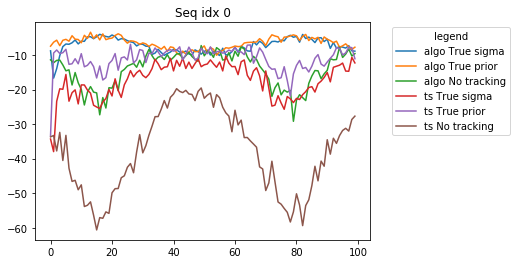

Here


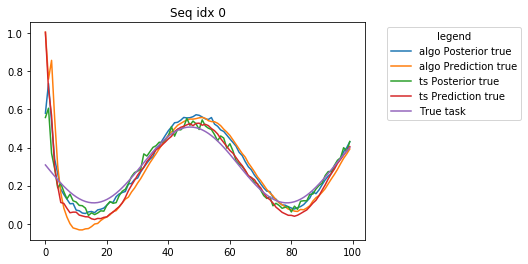

(20, 8, 2)
(20, 8, 2)


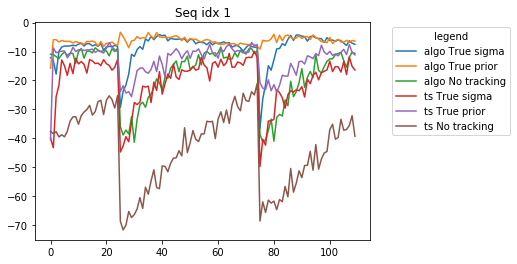

Here


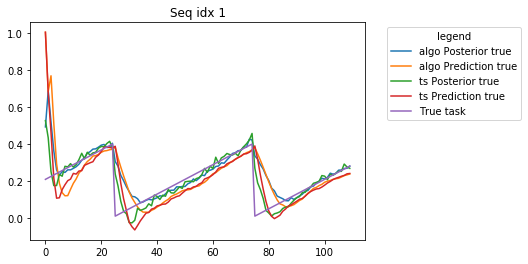

In [246]:
# Create python plots from meta-test results
prior_sequences, gp_list_sequences, init_prior = get_sequences(n_restarts=10,
                                                               num_test_processes=1,
                                                               std=noise_seq_var ** (1 / 2))

fd, folder_path_with_date = handle_folder_creation(result_path=folder)
view_results_real([o[0], o[1]], ['algo', 'ts'], [True, True], len(init_prior), prior_sequences,
             init_priors=init_prior,
             rescale_latent=[0.01, 2],
             dump_data=True,
             save_fig=True,
             folder=folder_path_with_date,
             view_tracking=True)

In [173]:

def view_results_real(r_list, label_list, has_track_list, num_seq, prior_seqs, init_priors,
                 save_fig, folder, dump_data, rescale_latent=None, view_tracking=False):
    if dump_data:
        with open("{}data_results.pkl".format(folder), "wb") as output:
            pickle.dump(r_list, output)

    for seq in range(num_seq):
        # View rewards
        for r, label, has_track in zip(r_list, label_list, has_track_list):
            r = np.array(r)
            if not has_track:
                r = np.array([r[i][seq] for i in range(r.shape[0])])
                plt.plot(np.mean(r, 0), label=label)
            else:
                print(r.shape)
                t = np.array([r[p, 0, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " True sigma")

                # t = np.array([r[p, 1, seq] for p in range(r.shape[0])])
                # plt.plot(np.mean(t, 0), label=label + " False sigma")

                t = np.array([r[p, 2, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " True prior")

                t = np.array([r[p, 3, seq] for p in range(r.shape[0])])
                plt.plot(np.mean(t, 0), label=label + " No tracking")

        plt.title("Seq idx {}".format(seq))
        plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
        if save_fig:
            plt.savefig("{}seq_{}_reward".format(folder, seq))
        plt.show()
        print("Here")
        if view_tracking:
            # View tracking
            for r, label, has_track in zip(r_list, label_list, has_track_list):
                r = np.array(r)
                if has_track:
                    seq_len = len(prior_seqs[seq])
                    x = np.arange(seq_len)

                    t = np.array([r[p, 4, seq][:, 0, 0].tolist() for p in range(r.shape[0])])
                    if rescale_latent is not None:
                        t = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t - 1) + rescale_latent[1]
                    plt.plot(x, np.mean(t, 0), label=label + " Posterior true")

                    #t = np.array([r[p, 6, seq][:, 0, 0].tolist() for p in range(r.shape[0])])
                    #if rescale_latent is not None:
                    #    t = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t - 1) + rescale_latent[1]
                    #plt.plot(x, np.mean(t, 0), label=label + " Posterior false")

                    t = np.array([r[p, 5, seq] for p in range(r.shape[0])])
                    t = np.mean(t, 0)
                    t2 = np.zeros(t.shape[0])
                    t2[1:] = t[:-1]
                    t2[0] = init_priors[seq][0][0].item()
                    if rescale_latent is not None:
                        t2 = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t2 - 1) + rescale_latent[1]
                    plt.plot(x, t2, label=label + " Prediction true")

                    #t = np.array([r[p, 7, seq] for p in range(r.shape[0])])
                    #t = np.mean(t, 0)
                    #t2 = np.zeros(t.shape[0])
                    #t2[1:] = t[:-1]
                    #t2[0] = init_priors[seq][0][0].item()
                    #if rescale_latent is not None:
                    #    t2 = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (t2 - 1) + rescale_latent[1]
                    #plt.plot(x, t2, label=label + " Posterior false")

            num_t = len(prior_seqs[seq])
            true_task = np.array([prior_seqs[seq][i][0].item() for i in range(num_t)])
            if rescale_latent is not None:
                true_task = ((rescale_latent[1] - rescale_latent[0]) / (1 - (-1))) * (true_task - 1) + \
                            rescale_latent[1]
            plt.plot(true_task, label="True task")

            plt.title("Seq idx {}".format(seq))
            plt.legend(title='legend', bbox_to_anchor=(1.05, 1), loc='upper left')
            if save_fig:
                plt.savefig("{}seq_{}_tracking".format(folder, seq))
            plt.show()


In [172]:
np.array(o[0]).shape

(20, 8, 2)

In [136]:
rl.shape

(20, 2)

In [138]:
rl.shape

(20, 200)

In [151]:
prior_sequences

[[tensor([[0.0000],
          [0.0010]]), tensor([[-0.0400],
          [ 0.0010]]), tensor([[-0.0799],
          [ 0.0010]])], [tensor([[0.0000],
          [0.0010]]), tensor([[0.0200],
          [0.0010]]), tensor([[0.0400],
          [0.0010]])]]

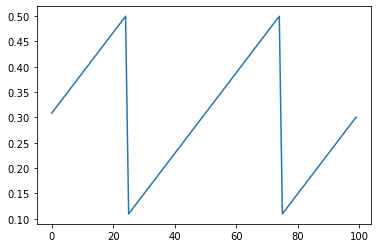

In [191]:
def f_sawtooth(x, period=50):
    saw_tooth = 2 * (x / period - np.floor(0.5 + x / period))
    saw_tooth = (-0.6 - (-1)) / (1 - (-1)) * (saw_tooth - 1) -0.5
    t = (2 - 0.01) / (1-(-1)) * (saw_tooth - 1) + 2
    return t

x = np.arange(100)
plt.plot(x, f_sawtooth(x))

In [205]:
t = np.array(o[0])

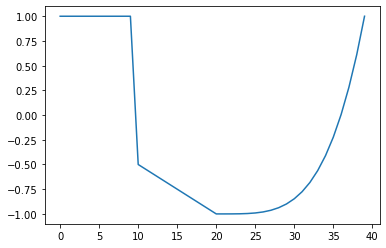

In [225]:
def f_mixture_changes(x):
    if x < 10:
        return 1
    elif 20 > x >= 10:
        return 0 - (x / 20)
    elif x >= 20:
        return -1 + np.power((x - 20), 4) / (130321 / 2)
x = np.arange(40)
y = [f_mixture_changes(elem) for elem in x]
y = np.array(y)
plt.plot(x, y)

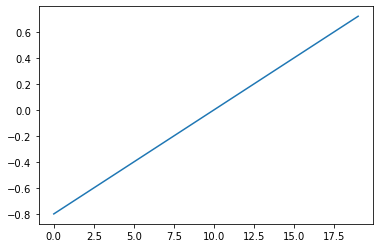

In [227]:
def f_linear(x, m=0.08, q=-0.8):
    return x * m + q
x = np.arange(20)
plt.plot(x, f_linear(x))

In [233]:
import numpy as np
import matplotlib.pyplot as plt

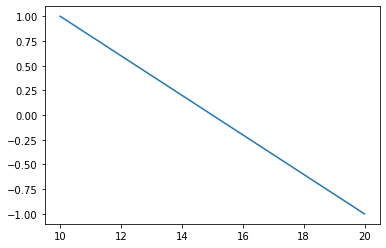

In [240]:
def decay(x):
    return 

x = np.arange(11) + 10
plt.plot(x, decay(x))

In [242]:
decay(x).min()

-1.0

In [241]:
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

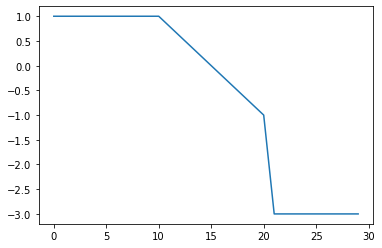

In [255]:
def f(idx):
    if idx < 10:
            return 1
    elif 20 >= idx >= 10:
        return 1 - (idx - 10) / 5
    elif idx > 20:
        return -3

x = np.arange(30)
y = [f(elem) for elem in x]
plt.plot(x, y)

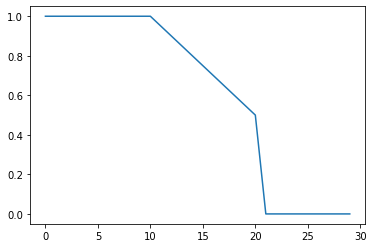

In [256]:
y = np.array(y)
y = (1 - 0.5) / (1 - (-1)) * (y - 1) + 1
plt.plot(x, y)

In [257]:
y.min()

0.0